In [42]:
# 01_intro_AI_on_Supercomputer

In [2]:
# Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time
import pandas as pd

In [4]:
# Download the data
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')

In [6]:
area, price = data['GrLivArea'].to_numpy(), data['SalePrice'].to_numpy()
num_points = len(area)
sum_area, sum_price = np.sum(area), np.sum(price)
sum_area_price, sum_area_squared = np.sum(area * price), np.sum(area * area)
denominator = num_points * sum_area_squared - sum_area**2
slope = (num_points * sum_area_price - sum_area * sum_price) / denominator
intercept = (sum_price * sum_area_squared - sum_area * sum_area_price) / denominator
print(f'y = {slope:.6f} * x + {intercept:.6f}')

In [31]:
# Linear model function
def model(x, m, b):
    """ Linear regression model: y = m * x + b """
    return m * x + b

In [32]:
# Loss function (Mean Squared Error)
def loss(x, y, m, b):
    """ Calculate the Mean Squared Error loss """
    y_pred = model(x, m, b)
    return np.mean((y - y_pred) ** 2)

In [33]:
# Gradient update for slope (m)
def updated_m(x, y, m, b, learning_rate):
    """ Update the slope (m) using gradient descent """
    dL_dm = -2 * np.mean(x * (y - model(x, m, b)))
    return m - learning_rate * dL_dm

# Gradient update for intercept (b)
def updated_b(x, y, m, b, learning_rate):
    """ Update the intercept (b) using gradient descent """
    dL_db = -2 * np.mean(y - model(x, m, b))
    return b - learning_rate * dL_db

# Function to plot data and linear fit
def plot_data(x, y, m, b, ax):
    """ Plot data and linear fit on given axes """
    ax.plot(x, y, 'ro', label='Data points')
    linear_x = np.linspace(x.min(), x.max(), 100)
    linear_y = model(linear_x, m, b)
    ax.plot(linear_x, linear_y, 'r-', label='Fit line')
    ax.legend()
    ax.set_xlabel('Square Footage')
    ax.set_ylabel('Sale Price')

[000]  dy_i = 53.35 * x + 17002.67     previously calculated: y_i = 5.00 * x + 1000.00    loss: 5679656964.197617
[001]  dy_i = 73.90 * x + 23918.07     previously calculated: y_i = 5.00 * x + 1000.00    loss: 2040404565.724365
[002]  dy_i = 82.60 * x + 26957.65     previously calculated: y_i = 5.00 * x + 1000.00    loss: 1381880711.534562
[003]  dy_i = 86.25 * x + 28342.92     previously calculated: y_i = 5.00 * x + 1000.00    loss: 1263218862.617074
[004]  dy_i = 87.75 * x + 29020.83     previously calculated: y_i = 5.00 * x + 1000.00    loss: 1241937925.921270
[005]  dy_i = 88.34 * x + 29395.11     previously calculated: y_i = 5.00 * x + 1000.00    loss: 1238061951.496189
[006]  dy_i = 88.54 * x + 29637.88     previously calculated: y_i = 5.00 * x + 1000.00    loss: 1237234353.398278
[007]  dy_i = 88.57 * x + 29822.57     previously calculated: y_i = 5.00 * x + 1000.00    loss: 1236918954.720666
[008]  dy_i = 88.53 * x + 29980.53     previously calculated: y_i = 5.00 * x + 1000.00  

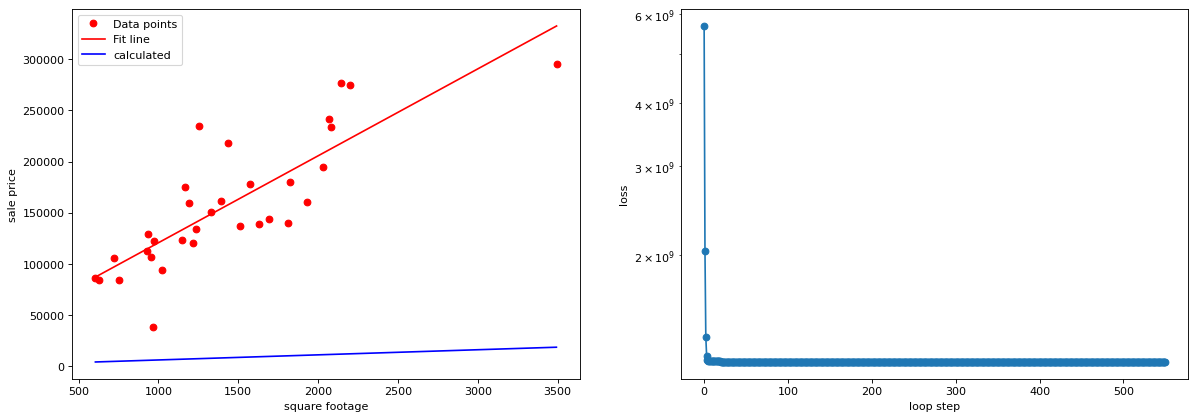

In [38]:
# Initial guess
m = 5.
b = 1000.

learning_rate_m = 1e-7
learning_rate_b = 1e-1
loss_history = []

batch_size = 32
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
loop_N = 32*len(data)//batch_size

for i in range(loop_N):
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)
   loss_value = np.mean(loss(data_x,data_y,m,b))
   loss_history.append(loss_value)
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,slope,intercept,loss_value))



plt.close('all')

# create a 1 by 2 plot grid
fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
# lot our usual output
plot_data(data_x,data_y,m,b,ax[0])

# here we also plot the calculated linear fit for comparison
line_x = np.arange(data_x.min(),data_x.max())
line_y = line_x * slope + intercept
ax[0].plot(line_x,line_y,'b-',label='calculated')
# add a legend to the plot and x/y labels
ax[0].legend()
ax[0].set_xlabel('square footage')
ax[0].set_ylabel('sale price')

# plot the loss
loss_x = np.arange(0,len(loss_history))
loss_y = np.asarray(loss_history)
ax[1].plot(loss_x,loss_y, 'o-')
ax[1].set_yscale('log')
ax[1].set_xlabel('loop step')
ax[1].set_ylabel('loss')
plt.show()
# gives us time to see the plot
time.sleep(2.5)
# clears the plot when the next plot is ready to show.
ipydis.clear_output(wait=True)


In [39]:
# Function to train the model using batch gradient descent
def train(batch_size, epochs=30, learning_rate_m=1e-7, learning_rate_b=1e-1):
    """ Train the model using batch gradient descent """
    loss_history = []
    num_batches = len(data) // batch_size
    loop_N = epochs * num_batches

    # Better initial guess: Using a more reasonable guess based on the data
    m, b = 1., 50000  # Improved initial guess for slope and intercept

    for i in range(loop_N):
        # Sample a batch of data
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()

        # Update parameters based on gradient descent
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        # Compute the current loss
        loss_value = loss(data_x, data_y, m, b)
        loss_history.append(loss_value)

        # Print progress at intervals
        if i % (loop_N // 10) == 0:  # Print every 10% of the way through
            print(f"Iteration {i}/{loop_N}, m={m:.4f}, b={b:.4f}, loss={loss_value:.4f}")

    # Return final parameters and the mean loss
    return m, b, np.mean(loss(data_x, data_y, m, b))

Iteration 0/240, m=46.2378, b=60693.9552, loss=6753915838.4780
Iteration 24/240, m=74.8878, b=50883.5981, loss=1090213269.0428
Iteration 48/240, m=81.3725, b=44908.3808, loss=2886301514.4275
Iteration 72/240, m=83.7480, b=40470.6946, loss=1851350955.9770
Iteration 96/240, m=93.2554, b=37895.2401, loss=3023700629.7504
Iteration 120/240, m=82.4689, b=37867.4413, loss=1313242954.9718
Iteration 144/240, m=83.5504, b=39624.2182, loss=804745117.3823
Iteration 168/240, m=84.9363, b=38864.9060, loss=1201281636.1767
Iteration 192/240, m=86.7914, b=38947.0117, loss=3022502869.4745
Iteration 216/240, m=85.7396, b=36293.6905, loss=2124963670.7067
Batch size: 64, m=87.0817, b=33787.0069, Final Loss=1013310733.2113
Iteration 0/120, m=35.1288, b=62138.8070, loss=4662553754.8812
Iteration 12/120, m=67.9132, b=63670.5945, loss=1349737186.2525
Iteration 24/120, m=72.4814, b=58926.6675, loss=1328381695.3968
Iteration 36/120, m=74.8410, b=53073.0968, loss=1146599538.4863
Iteration 48/120, m=77.4898, b=494

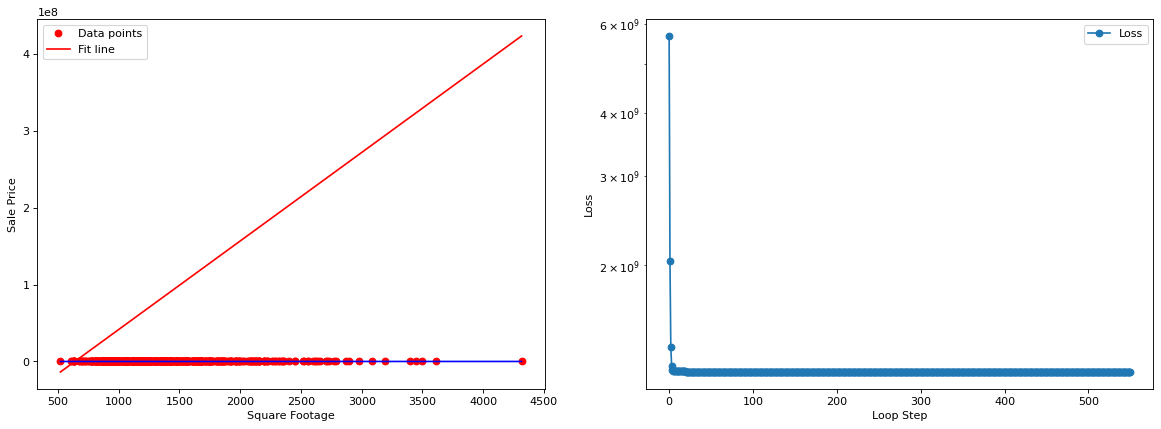

In [41]:
# With different batch sizes
batch_sizes = [64, 128, 256, 512]
for batch_size in batch_sizes:
    m, b, final_loss = train(batch_size, epochs=30)
    print(f"Batch size: {batch_size}, m={m:.4f}, b={b:.4f}, Final Loss={final_loss:.4f}")

# Try different learning rates and batch sizes
for i in [1, 2, 4, 8]:
    bs, lrm, lrb = np.array([64, 1e-7, 1e-1]) * i
    bs = int(bs)
    m, b, final_loss = train(bs, epochs=30, learning_rate_m=lrm, learning_rate_b=lrb)
    print(f"Batch size: {bs}, m={m:.4f}, b={b:.4f}, Final Loss={final_loss:.4f}")

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=80)

# Plot the data and the learned linear model
plot_data(data['GrLivArea'].to_numpy(), data['SalePrice'].to_numpy(), m, b, ax[0])

# Plot the original regression line for comparison
line_x = np.linspace(data['GrLivArea'].min(), data['GrLivArea'].max(), 100)
line_y = line_x * slope + intercept
ax[0].plot(line_x, line_y, 'b-', label='Calculated line (previous)')

# Loss plot
loss_x = np.arange(len(loss_history))
loss_y = np.array(loss_history)
ax[1].plot(loss_x, loss_y, 'o-', label='Loss')
ax[1].set_yscale('log')
ax[1].set_xlabel('Loop Step')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

ipydis.clear_output(wait=True)